In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
con = sqlite3.connect("database/db.sqlite")
cur = con.cursor()

In [15]:
res = cur.execute("SELECT * FROM float")
names = list(map(lambda x: x[0], cur.description))
values = res.fetchall()
values = pd.DataFrame(values,columns=names)
res = cur.execute("SELECT * FROM ea_optimizer_generation")
names = list(map(lambda x: x[0], cur.description))
generation = res.fetchall()
generation = pd.DataFrame(generation,columns=names)
res = cur.execute("SELECT * FROM ea_optimizer_individual")
names = list(map(lambda x: x[0], cur.description))
individual = res.fetchall()
individual = pd.DataFrame(individual,columns=names)

In [16]:
fmix = generation.set_index('individual_id').join(individual.set_index('individual_id'),lsuffix='l')
full = fmix.set_index('fitness_id').join(values.set_index('id'))
plot_data = full[['generation_index','value']].groupby(['generation_index']).mean()

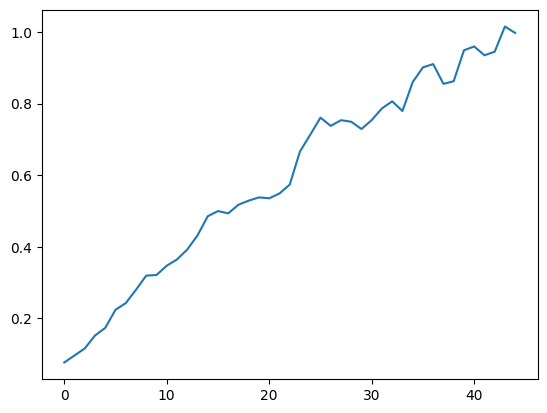

In [17]:
plt.plot(plot_data.index,plot_data['value'])